In [30]:
# 1. Các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

!pip install pmdarima
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARMA, ARMAResults, ARIMA, ARIMAResults
from pmdarima.arima import auto_arima

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

# **Chia train test theo tỉ lệ 8:2**



In [31]:
# 2. Đọc file dữ liệu tiền mã hóa Bitcoin và chia train test theo tỉ lệ 8:2
df = pd.read_csv('BTC.csv')
df = df[['Close']]
df = df.reset_index(drop=True) # Reset the index

# Split the data into training, testing sets
train_size = int(0.8 * len(df))
test_size = len(df) - train_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]

In [32]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])
# Tìm model phù hợp nhất và fit model (Nếu chuỗi không dừng auto_arima sẽ tự xử lý việc lấy sai phân)
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=5.29 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=25649.058, Time=0.14 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=25649.709, Time=0.14 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=25649.741, Time=0.27 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=25647.375, Time=0.09 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=25651.674, Time=1.04 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 7.004 seconds


ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [33]:
# 4. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
y_pred = model.predict(n_periods=len(y_test))

In [34]:
# 5. Đánh giá độ chính xác test
test_mae = mean_absolute_error(y_pred, y_test)
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
test_mape = mean_absolute_percentage_error(y_pred, y_test)
print('Testing MAE:', test_mae)
print('Testing RMSE:', test_rmse)
print('Testing MAPE:', test_mape)

Testing MAE: 13172.989086089236
Testing RMSE: 19292.47001422707
Testing MAPE: 0.4689303536660649


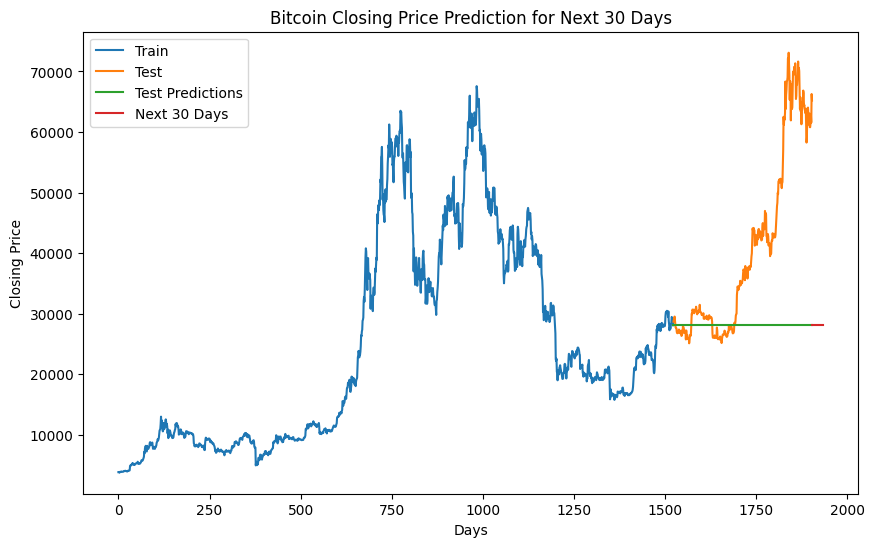

Predicted closing prices for the next 30 days:
[28091.56836 28091.56836 28091.56836 28091.56836 28091.56836 28091.56836
 28091.56836 28091.56836 28091.56836 28091.56836 28091.56836 28091.56836
 28091.56836 28091.56836 28091.56836 28091.56836 28091.56836 28091.56836
 28091.56836 28091.56836 28091.56836 28091.56836 28091.56836 28091.56836
 28091.56836 28091.56836 28091.56836 28091.56836 28091.56836 28091.56836]


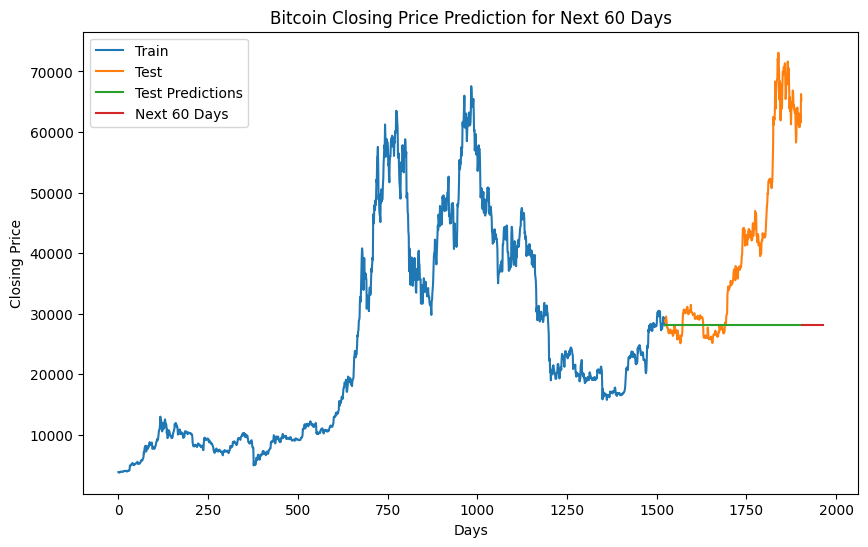

Predicted closing prices for the next 60 days:
[28091.56836 28091.56836 28091.56836 28091.56836 28091.56836 28091.56836
 28091.56836 28091.56836 28091.56836 28091.56836 28091.56836 28091.56836
 28091.56836 28091.56836 28091.56836 28091.56836 28091.56836 28091.56836
 28091.56836 28091.56836 28091.56836 28091.56836 28091.56836 28091.56836
 28091.56836 28091.56836 28091.56836 28091.56836 28091.56836 28091.56836
 28091.56836 28091.56836 28091.56836 28091.56836 28091.56836 28091.56836
 28091.56836 28091.56836 28091.56836 28091.56836 28091.56836 28091.56836
 28091.56836 28091.56836 28091.56836 28091.56836 28091.56836 28091.56836
 28091.56836 28091.56836 28091.56836 28091.56836 28091.56836 28091.56836
 28091.56836 28091.56836 28091.56836 28091.56836 28091.56836 28091.56836]


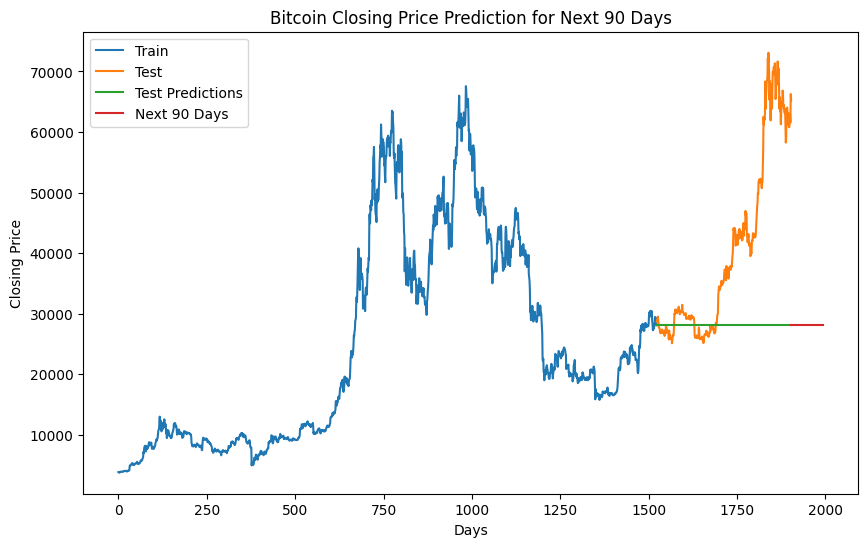

Predicted closing prices for the next 90 days:
[28091.56836 28091.56836 28091.56836 28091.56836 28091.56836 28091.56836
 28091.56836 28091.56836 28091.56836 28091.56836 28091.56836 28091.56836
 28091.56836 28091.56836 28091.56836 28091.56836 28091.56836 28091.56836
 28091.56836 28091.56836 28091.56836 28091.56836 28091.56836 28091.56836
 28091.56836 28091.56836 28091.56836 28091.56836 28091.56836 28091.56836
 28091.56836 28091.56836 28091.56836 28091.56836 28091.56836 28091.56836
 28091.56836 28091.56836 28091.56836 28091.56836 28091.56836 28091.56836
 28091.56836 28091.56836 28091.56836 28091.56836 28091.56836 28091.56836
 28091.56836 28091.56836 28091.56836 28091.56836 28091.56836 28091.56836
 28091.56836 28091.56836 28091.56836 28091.56836 28091.56836 28091.56836
 28091.56836 28091.56836 28091.56836 28091.56836 28091.56836 28091.56836
 28091.56836 28091.56836 28091.56836 28091.56836 28091.56836 28091.56836
 28091.56836 28091.56836 28091.56836 28091.56836 28091.56836 28091.56836
 280

In [35]:
# 6. Dự đoán cho 30, 60, 90 ngày tiếp theo
future_days = [30, 60, 90]
for days in future_days:
    y_future = model.predict(n_periods=days)
    last_index = len(df) - 1
    y_future = pd.Series(y_future, index=range(last_index + 1, last_index + 1 + days))

    # Vẽ hình
    plt.figure(figsize=(10, 6))
    plt.plot(train_data.index, train_data['Close'], label='Train')
    plt.plot(test_data.index, test_data['Close'], label='Test')
    plt.plot(test_data.index, y_pred, label='Test Predictions')
    plt.plot(y_future.index, y_future, label=f'Next {days} Days')
    plt.xlabel('Days')
    plt.ylabel('Closing Price')
    plt.legend()
    plt.title(f'Bitcoin Closing Price Prediction for Next {days} Days')
    plt.show()

    print(f'Predicted closing prices for the next {days} days:')
    print(y_future.values)

# **Chia train test theo tỉ lệ 7:3**

In [36]:
# 2. Đọc file dữ liệu tiền mã hóa Bitcoin và chia train test theo tỉ lệ 7:3
df = pd.read_csv('BTC.csv')
df = df[['Close']]
df = df.reset_index(drop=True) # Reset the index

# Split the data into training, testing, sets
train_size = int(0.7 * len(df))
test_size = len(df) - train_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]

In [37]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])
# Tìm model phù hợp nhất và fit model (Nếu chuỗi không dừng auto_arima sẽ tự xử lý việc lấy sai phân)
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=22550.506, Time=3.15 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=22554.918, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=22555.481, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=22555.510, Time=0.16 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=22553.051, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=22558.623, Time=0.67 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=22559.420, Time=0.32 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=22552.476, Time=6.95 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=22552.365, Time=6.29 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=22557.461, Time=0.14 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=22559.666, Time=1.64 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=22559.808, Time=0.72 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=7.06 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=22548.643, Time=1.90 sec
 ARIMA(1,1,2)(0,0,0)[0]  

ARIMA(order=(2, 1, 2), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [38]:
# 4. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
y_pred = model.predict(n_periods=len(y_test))

In [39]:
# 5. Đánh giá độ chính xác test
test_mae = mean_absolute_error(y_pred, y_test)
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
test_mape = mean_absolute_percentage_error(y_pred, y_test)
print('Testing MAE:', test_mae)
print('Testing RMSE:', test_rmse)
print('Testing MAPE:', test_mape)

Testing MAE: 15599.486050932599
Testing RMSE: 21344.37261380981
Testing MAPE: 0.810714987112687


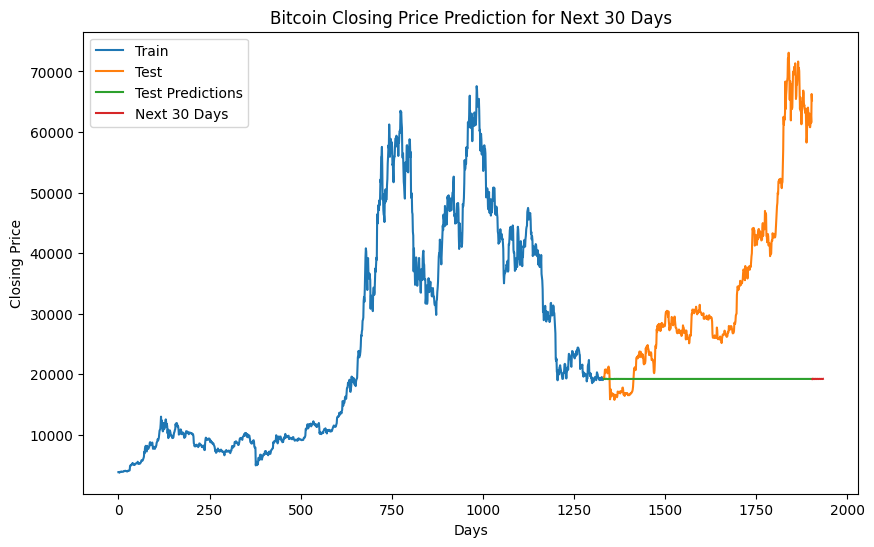

Predicted closing prices for the next 30 days:
[19222.79153211 19257.57586026 19272.24610578 19251.6522731
 19221.15420108 19215.58062114 19239.57352084 19264.32968459
 19262.04658179 19237.02639544 19218.78384728 19227.33325495
 19251.36342177 19262.93717225 19249.88235821 19228.42161273
 19223.1556459  19238.94421666 19256.73030987 19256.44576924
 19239.57422925 19226.09885595 19230.90757514 19247.43108401
 19256.39039498 19248.22902234 19233.19983956 19228.59420744
 19238.90355828 19251.60914589]


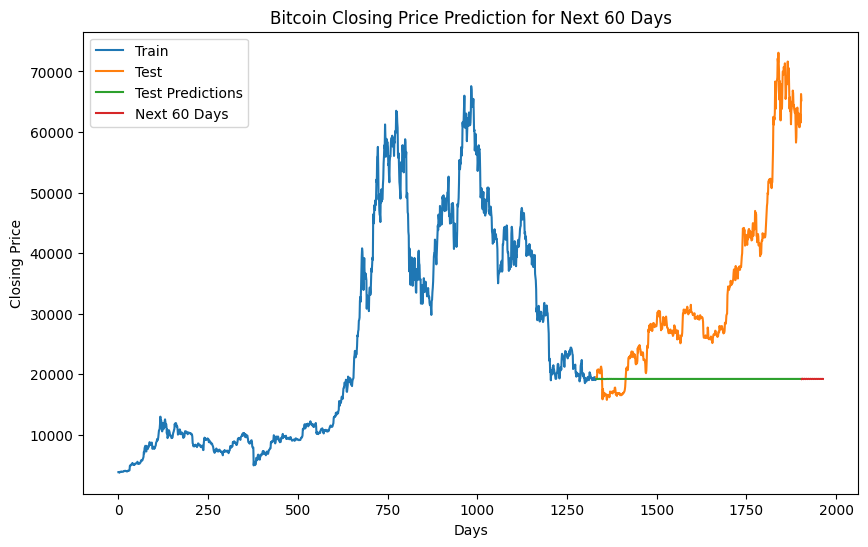

Predicted closing prices for the next 60 days:
[19222.79153211 19257.57586026 19272.24610578 19251.6522731
 19221.15420108 19215.58062114 19239.57352084 19264.32968459
 19262.04658179 19237.02639544 19218.78384728 19227.33325495
 19251.36342177 19262.93717225 19249.88235821 19228.42161273
 19223.1556459  19238.94421666 19256.73030987 19256.44576924
 19239.57422925 19226.09885595 19230.90757514 19247.43108401
 19256.39039498 19248.22902234 19233.19983956 19228.59420744
 19238.90355828 19251.60914589 19252.31270837 19240.99903018
 19231.12601823 19233.66913816 19244.9771653  19251.80813955
 19246.79261975 19236.31684557 19232.47678155 19239.14973103
 19248.17730555 19249.28722718 19241.74548806 19234.56448531
 19235.77136072 19243.47252971 19248.61590491 19245.60026269
 19238.3321879  19235.2337529  19239.50978184 19245.89127502
 19247.08844946 19242.09331869 19236.90485468 19237.35213771
 19242.57051153 19246.40233028 19244.64122817 19239.62198164]


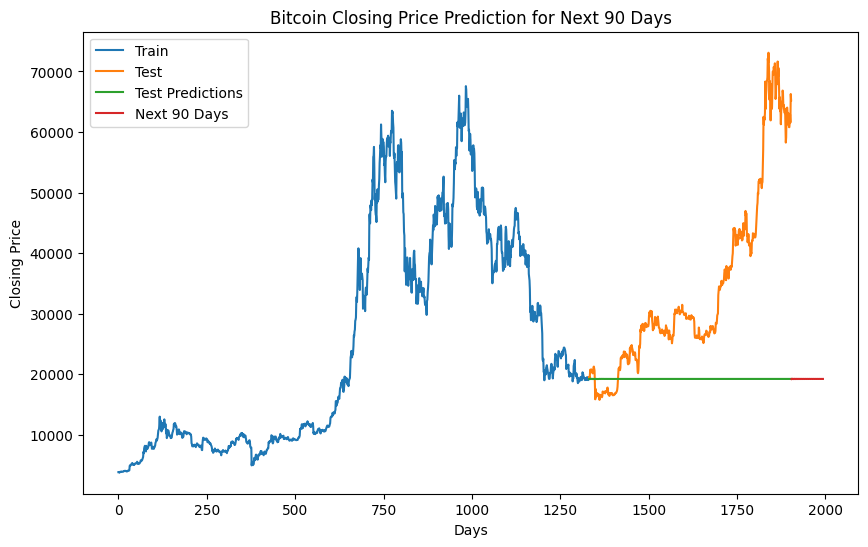

Predicted closing prices for the next 90 days:
[19222.79153211 19257.57586026 19272.24610578 19251.6522731
 19221.15420108 19215.58062114 19239.57352084 19264.32968459
 19262.04658179 19237.02639544 19218.78384728 19227.33325495
 19251.36342177 19262.93717225 19249.88235821 19228.42161273
 19223.1556459  19238.94421666 19256.73030987 19256.44576924
 19239.57422925 19226.09885595 19230.90757514 19247.43108401
 19256.39039498 19248.22902234 19233.19983956 19228.59420744
 19238.90355828 19251.60914589 19252.31270837 19240.99903018
 19231.12601823 19233.66913816 19244.9771653  19251.80813955
 19246.79261975 19236.31684557 19232.47678155 19239.14973103
 19248.17730555 19249.28722718 19241.74548806 19234.56448531
 19235.77136072 19243.47252971 19248.61590491 19245.60026269
 19238.3321879  19235.2337529  19239.50978184 19245.89127502
 19247.08844946 19242.09331869 19236.90485468 19237.35213771
 19242.57051153 19246.40233028 19244.64122817 19239.62198164
 19237.18149255 19239.88951481 19244.37

In [40]:
# 6. Dự đoán cho 30, 60, 90 ngày tiếp theo
future_days = [30, 60, 90]
for days in future_days:
    y_future = model.predict(n_periods=days)
    last_index = len(df) - 1
    y_future = pd.Series(y_future, index=range(last_index + 1, last_index + 1 + days))

    # Vẽ hình
    plt.figure(figsize=(10, 6))
    plt.plot(train_data.index, train_data['Close'], label='Train')
    plt.plot(test_data.index, test_data['Close'], label='Test')
    plt.plot(test_data.index, y_pred, label='Test Predictions')
    plt.plot(y_future.index, y_future, label=f'Next {days} Days')
    plt.xlabel('Days')
    plt.ylabel('Closing Price')
    plt.legend()
    plt.title(f'Bitcoin Closing Price Prediction for Next {days} Days')
    plt.show()

    print(f'Predicted closing prices for the next {days} days:')
    print(y_future.values)

# **Chia train test theo tỉ lệ 6:4**

In [41]:
# 2. Đọc file dữ liệu tiền mã hóa Bitcoin và chia train test theo tỉ lệ 6:4
df = pd.read_csv('BTC.csv')
df = df[['Close']]
df = df.reset_index(drop=True) # Reset the index

# Split the data into training, testing sets
train_size = int(0.6 * len(df))
test_size = len(df) - train_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]

In [42]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])
# Tìm model phù hợp nhất và fit model (Nếu chuỗi không dừng auto_arima sẽ tự xử lý việc lấy sai phân)
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=19402.728, Time=2.39 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=19407.637, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=19408.537, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=19408.537, Time=0.20 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=19406.466, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=19412.546, Time=1.04 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=19412.525, Time=0.60 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=19404.661, Time=3.47 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=19404.743, Time=2.84 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=19410.543, Time=0.12 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=19413.814, Time=0.99 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=19413.921, Time=0.70 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=19406.814, Time=3.30 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=19401.588, Time=2.98 sec
 ARIMA(1,1,2)(0,0,0

ARIMA(order=(2, 1, 2), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [43]:
# 4. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
y_pred = model.predict(n_periods=len(y_test))

In [44]:
# 5. Đánh giá độ chính xác validate, test
test_mae = mean_absolute_error(y_pred, y_test)
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
test_mape = mean_absolute_percentage_error(y_pred, y_test)
print('Testing MAE:', test_mae)
print('Testing RMSE:', test_rmse)
print('Testing MAPE:', test_mape)

Testing MAE: 14959.784261770697
Testing RMSE: 16659.964567534866
Testing MAPE: 0.36715443492982974


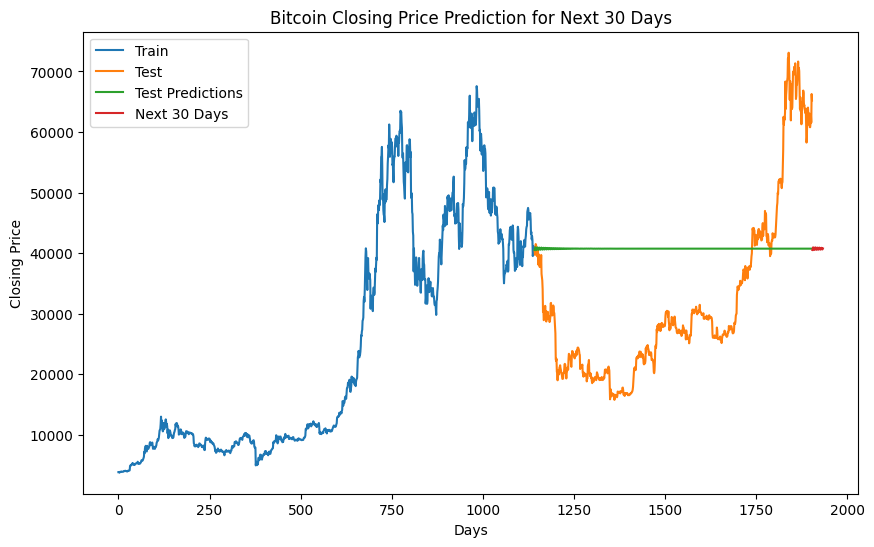

Predicted closing prices for the next 30 days:
[40522.7902981  40744.28079257 40958.56844778 40923.92897156
 40688.6064813  40525.70132304 40616.52206502 40849.20488903
 40955.78699288 40820.53196578 40605.04598369 40555.61230447
 40721.96658884 40908.33832169 40903.52977018 40719.98064665
 40571.52073219 40624.51465448 40811.73178459 40916.83239079
 40824.14040486 40645.5820055  40585.94590261 40708.21704334
 40867.64886102 40882.83747981 40741.91949637 40609.75280431
 40635.2682736  40783.87071201]


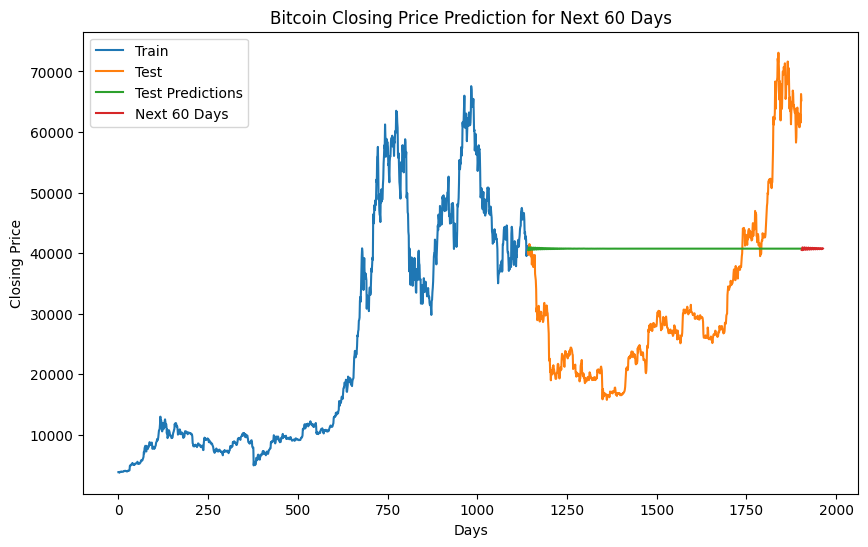

Predicted closing prices for the next 60 days:
[40522.7902981  40744.28079257 40958.56844778 40923.92897156
 40688.6064813  40525.70132304 40616.52206502 40849.20488903
 40955.78699288 40820.53196578 40605.04598369 40555.61230447
 40721.96658884 40908.33832169 40903.52977018 40719.98064665
 40571.52073219 40624.51465448 40811.73178459 40916.83239079
 40824.14040486 40645.5820055  40585.94590261 40708.21704334
 40867.64886102 40882.83747981 40741.91949637 40609.75280431
 40635.2682736  40783.87071201 40883.23506441 40822.95755799
 40676.96092366 40613.25748298 40700.76829558 40835.12590068
 40862.88681221 40756.60983056 40641.22470157 40647.36620881
 40763.64320353 40854.70961042 40818.65130773 40700.84880212
 40637.32992341 40697.83427306 40809.48889898 40844.33029727
 40765.82949356 40666.79065914 40659.80828877 40749.39213491
 40830.83737748 40812.46883735 40718.6891762  40658.16577255
 40698.02649294 40789.57731382 40827.53754035 40771.00475195]


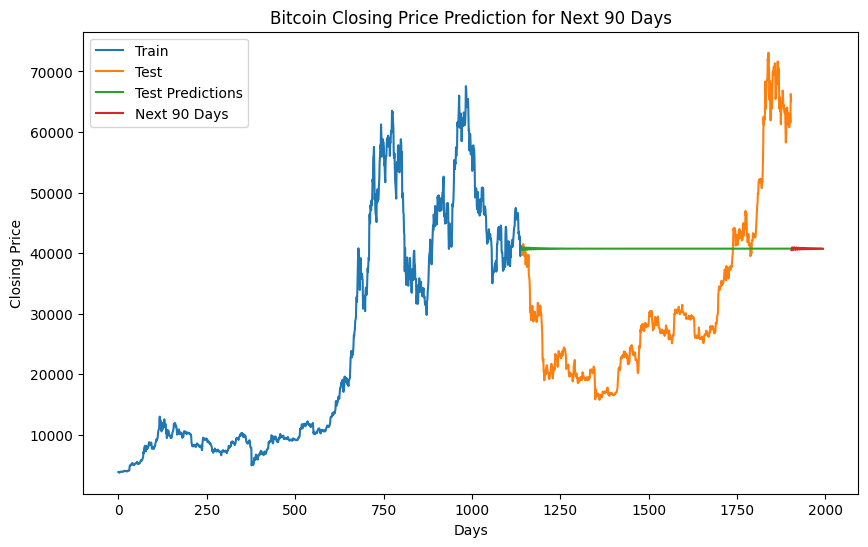

Predicted closing prices for the next 90 days:
[40522.7902981  40744.28079257 40958.56844778 40923.92897156
 40688.6064813  40525.70132304 40616.52206502 40849.20488903
 40955.78699288 40820.53196578 40605.04598369 40555.61230447
 40721.96658884 40908.33832169 40903.52977018 40719.98064665
 40571.52073219 40624.51465448 40811.73178459 40916.83239079
 40824.14040486 40645.5820055  40585.94590261 40708.21704334
 40867.64886102 40882.83747981 40741.91949637 40609.75280431
 40635.2682736  40783.87071201 40883.23506441 40822.95755799
 40676.96092366 40613.25748298 40700.76829558 40835.12590068
 40862.88681221 40756.60983056 40641.22470157 40647.36620881
 40763.64320353 40854.70961042 40818.65130773 40700.84880212
 40637.32992341 40697.83427306 40809.48889898 40844.33029727
 40765.82949356 40666.79065914 40659.80828877 40749.39213491
 40830.83737748 40812.46883735 40718.6891762  40658.16577255
 40698.02649294 40789.57731382 40827.53754035 40771.00475195
 40687.28422422 40671.91577423 40739.7

In [45]:
# 6. Dự đoán cho 30, 60, 90 ngày tiếp theo
future_days = [30, 60, 90]
for days in future_days:
    y_future = model.predict(n_periods=days)
    last_index = len(df) - 1
    y_future = pd.Series(y_future, index=range(last_index + 1, last_index + 1 + days))

    # Vẽ hình
    plt.figure(figsize=(10, 6))
    plt.plot(train_data.index, train_data['Close'], label='Train')
    plt.plot(test_data.index, test_data['Close'], label='Test')
    plt.plot(test_data.index, y_pred, label='Test Predictions')
    plt.plot(y_future.index, y_future, label=f'Next {days} Days')
    plt.xlabel('Days')
    plt.ylabel('Closing Price')
    plt.legend()
    plt.title(f'Bitcoin Closing Price Prediction for Next {days} Days')
    plt.show()

    print(f'Predicted closing prices for the next {days} days:')
    print(y_future.values)